<a href="https://colab.research.google.com/github/BlackUBird/TMCIT_T5DSP/blob/main/T5_DSP_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# 前準備
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from numpy.fft import fft, ifft, fftfreq
from IPython.display import Audio



In [37]:
# 誕生日
# 月
myBirthM = 9
# 日(下1桁)
myBirthD_ls = 6


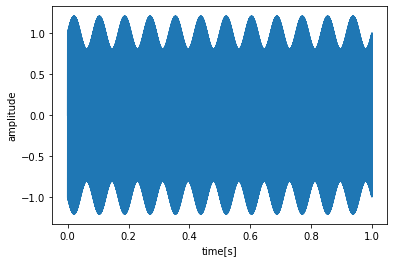

In [38]:
# 信号の生成
# サンプリング周波数
fs = 48000
# 信号長
t = np.arange( 0 , 1 , 1/fs )
# 搬送波の周波数
f_car = myBirthM * 500
# 包絡線の周波数
f_env = myBirthD_ls * 2

# 信号
h = np.sin( 2*np.pi*f_car*t ) * ( 1 + 0.2*np.sin( 2*np.pi*f_env*t ) )

# 表示
plt.plot( t , h )
plt.xlabel( "time[s]" )
plt.ylabel( "amplitude" )

# 音声にする
Audio( h , rate = fs )


48000


Text(0, 0.5, 'signal(fft)(imag)')

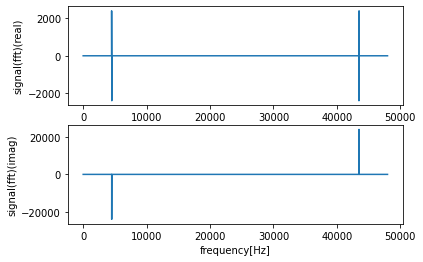

In [39]:
# 解析的信号を生成する
# 元信号をフーリエ変換
H = fft( h )

# 長さを格納
H_len = len( H )
print( H_len )

# 表示
# 実数部
plt.subplot( 2 , 1 , 1 )
plt.plot( H.real )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft)(real)" )
# 虚数部
plt.subplot( 2 , 1 , 2 )
plt.plot( H.imag )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft)(imag)" )



長さ: 48000


Text(0, 0.5, 'signal(fft->OneSided)(imag)')

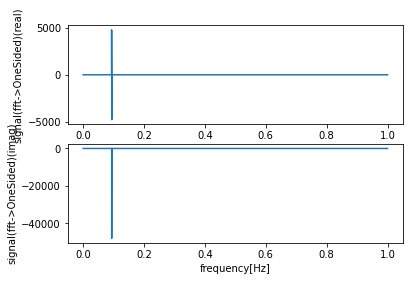

In [40]:
# 片側スペクトルに変換
# 変換
H_sided = H
for k in range( 0 , H_len , 1 ) :
  if k == 0 or k == H_len//2 :
    H_sided[ k ] = H[ k ]
  elif k > 0 and k < H_len//2 :
    H_sided[ k ] = 2*H[ k ]
  else :
    H_sided[ k ] = 0

# 表示
print( "長さ:" , len( H_sided ) )
# 実数部
plt.subplot( 2 , 1 , 1 )
plt.plot( t , H_sided.real )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft->OneSided)(real)" )
# 虚数部
plt.subplot( 2 , 1 , 2 )
plt.plot( t , H_sided.imag )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft->OneSided)(imag)" )


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'signal(fft->OneSided->ifft)')

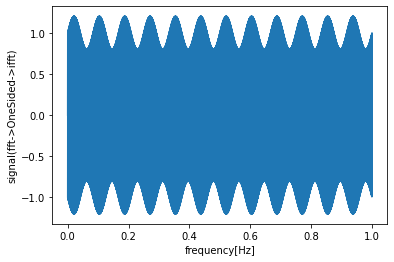

In [41]:
# 片側スペクトルを逆フーリエ変換する
h_sided = ifft( H_sided )

# 表示
plt.plot( t , h_sided )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(fft->OneSided->ifft)" )


Text(0, 0.5, 'signal(ifft)(imag)')

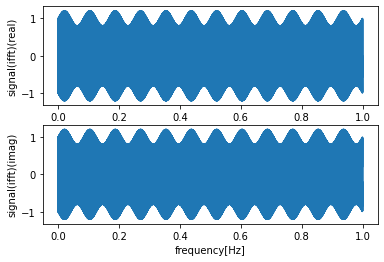

In [42]:
# 片側スペクトルを逆フーリエ変換する
# 実数部
plt.subplot( 2 , 1 , 1 )
plt.plot( t , h_sided.real )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(ifft)(real)" )
# 虚数部
plt.subplot( 2 , 1 , 2 )
plt.plot( t , h_sided.imag )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal(ifft)(imag)" )



Text(0, 0.5, 'carrier')

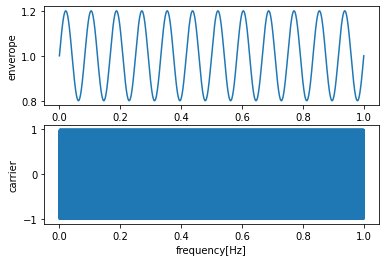

In [43]:
# 包絡線/搬送波を取得する
# 包絡線
env = np.abs( h_sided )
# 搬送波
car = np.cos( np.angle( h_sided ) )

# 表示
# 包絡線
plt.subplot( 2 , 1 , 1 )
plt.plot( t , env )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "enverope" )
# 搬送波
plt.subplot( 2 , 1 , 2 )
plt.plot( t , car )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "carrier" )



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


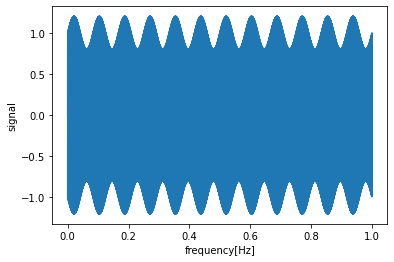

In [44]:
# 再構成する
h_re = env * car

# 表示
plt.plot( t , h_sided )
plt.xlabel( "frequency[Hz]" )
plt.ylabel( "signal" )

# 音声にする
Audio( h_re , rate = fs )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log


44100
[[1592. 1592.]
 [1244. 1244.]
 [ 890.  890.]
 ...
 [1286. 1286.]
 [ 948.  948.]
 [ 616.  616.]]
44100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log


[[358. 358.]
 [342. 342.]
 [344. 344.]
 ...
 [560. 560.]
 [516. 516.]
 [446. 446.]]
44100
[[404. 404.]
 [390. 390.]
 [378. 378.]
 ...
 [462. 462.]
 [440. 440.]
 [406. 406.]]
44100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log


[[ 52.  52.]
 [ 50.  50.]
 [ 46.  46.]
 ...
 [158. 158.]
 [152. 152.]
 [144. 144.]]
44100
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


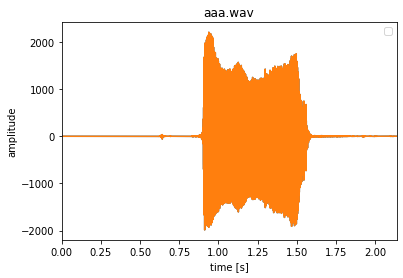

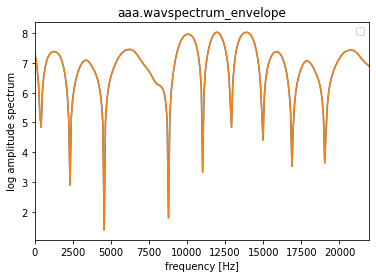

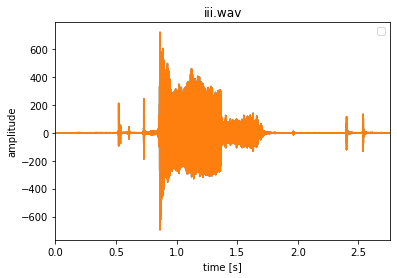

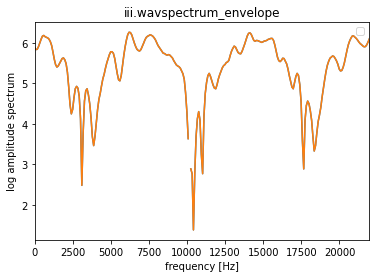

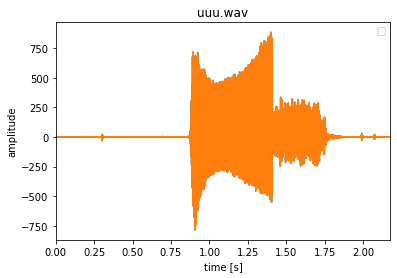

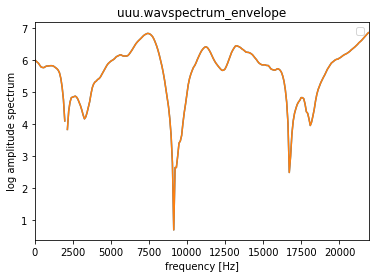

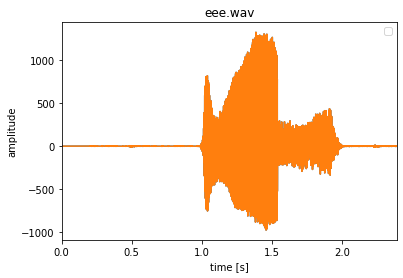

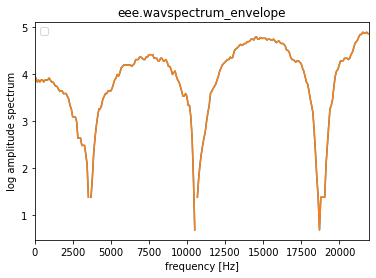

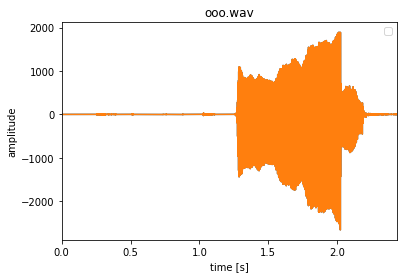

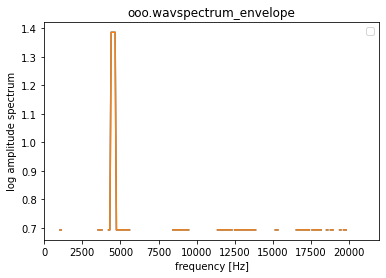

<Figure size 432x288 with 0 Axes>

In [135]:
# ↓課題2↓
# あいうえお音声ファイルを入力
fname = np.array( [ "aaa.wav" , "iii.wav" , "uuu.wav" , "eee.wav" , "ooo.wav" ] )


for i in range(5):
  # サンプリング周波数,振幅
  f_fs , a = read(fname[i])
  print( f_fs )


  # 信号長
  f_t = np.arange( 0, len(a) )/f_fs
  #print( "len(f_t):" , len(f_t) )
  # 振幅
  # 絶対値
  a_abs = np.abs(a)
  # を平坦化
  a_abs = a_abs.flatten()
  #print( "a_abs:" , a_abs )
  # したものの中の最大値
  a_abs_max = max( a_abs )
  #print( "a_abs_max:" , a_abs_max )
  plt.xlim(0, len(a)/fs)
  plt.xlabel("time [s]")
  plt.ylabel("amplitude")
  plt.title( fname[i] )
  plt.plot(f_t,a)
  plt.legend()
  plt.figure()

  # 解析区間を抽出
  f_start_sec = 1
  N = 512
  start_sample = int( f_start_sec*f_fs )
  end_sample = start_sample+N

  # 解析区間
  x = a[start_sample:end_sample]
  t_target = np.arange( 0 , N )/f_fs
  #plt.xlim( 0 , N/f_fs )
  #plt.xlabel( "time [s]" )
  #plt.ylabel( "amplitude" )
  #plt.plot( t_target , x )
  #plt.legend()
  #plt.figure()


  # フーリエ変換
  X = fft( x )
  freqs = fftfreq( N , d=1.0/f_fs)
  #plt.subplot( 2 , 1 , 1 )
  #plt.plot(freqs, X.real)
  #plt.xlim( min(freqs) , max(freqs) )
  #plt.ylabel( "real part" )
  #plt.legend()
  #plt.figure()
  #plt.subplot( 2 , 1 , 2 )
  #plt.plot( freqs , X.imag )
  #plt.xlim( min(freqs) , max(freqs) )
  #plt.ylabel( "imag part" )
  #plt.xlabel( "frequency [Hz]" )
  #plt.legend()
  #plt.figure()
  #print( X )
  for j in range(len(X)):
    X[j] = np.delete( X[j] , 1 )
  #print( X )

  # 振幅スペクトル
  # 大きさ
  X_abs = np.abs( X )
  # 位相
  X_angle = np.angle( X )

  print( X_abs )

  # 大きさの自然対数をとる
  X_ln = np.log( X_abs )

  # ケプストラム生成
  ceps = ifft( X_ln )

  # リフタリング
  # ケプストラムの低次成分を抽出
  # 抽出する次数
  low_sample = 30
  ceps_low = np.copy( ceps )
  ceps_low[ low_sample:N-low_sample ]

  #スペクトル包絡の導出
  spec_env = fft( ceps_low )
  # 可視化
  freqs = fftfreq( N , d=1.0/f_fs )
  plt.plot( freqs[:N//2] , spec_env[:N//2].real )
  plt.xlim( 0 , max(freqs[:N//2]) )
  plt.xlabel("frequency [Hz]")
  plt.ylabel("log amplitude spectrum")
  plt.title( fname[i] + "spectrum_envelope" )
  plt.legend()
  plt.figure()



